# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.2

In questo esercizio dobbiamo parallezziare il codice tramite la libreria $"mpi"$ dell'esercitazione precedente e applicarlo al seguente problema. Bisogna trovare il percorso più breve tra i $110$ capoluoghi di provincia italiani.

Per farlo sono stati utilizzati $6$ nodi, dove ognuno calcola le sue generazioni, e poi, ogni volta che il numero di generazioni è multiplo di $10$, i nodi si parlano tra loro, trasmettendo ognuno il suo percorso migliore, viene poi scelto il percorso migliore tra tutti quelli trasmessi, e questo viene poi mandato a tutti i nodi, che lo utilizzano per la generazione successiva.

Nella cella sottostante si può vedere il fitness migliore per ogni nodo in funzione della generazione, e il grafico del miglior percorso ottenuto, che risulta essere di $66.1883$.

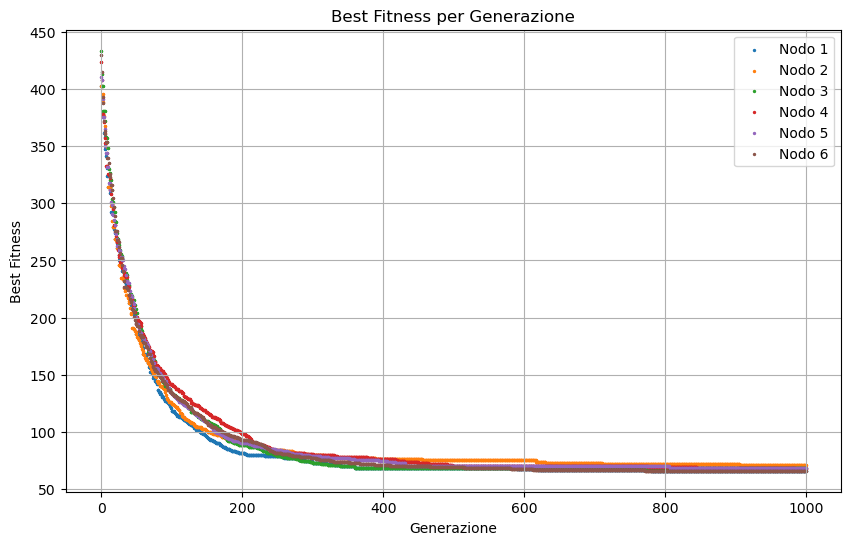

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il file fitness_per_generation.dat
filename = 'fitness_per_generation.dat'
data = pd.read_csv(filename, delim_whitespace=True, header=None)

# Imposta la prima colonna come generazioni
generations = data.iloc[:, 0]

# Imposta le colonne successive come fitness per ogni nodo
fitness_per_node = data.iloc[:, 1:]

# Crea il grafico
plt.figure(figsize=(10, 6))
for i in range(fitness_per_node.shape[1]):
    plt.scatter(generations, fitness_per_node.iloc[:, i], label=f'Nodo {i+1}', s=2)  # s è la dimensione dei punti, ridotto a 20

# Aggiungi titolo e etichette
plt.title('Best Fitness per Generazione')
plt.xlabel('Generazione')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()

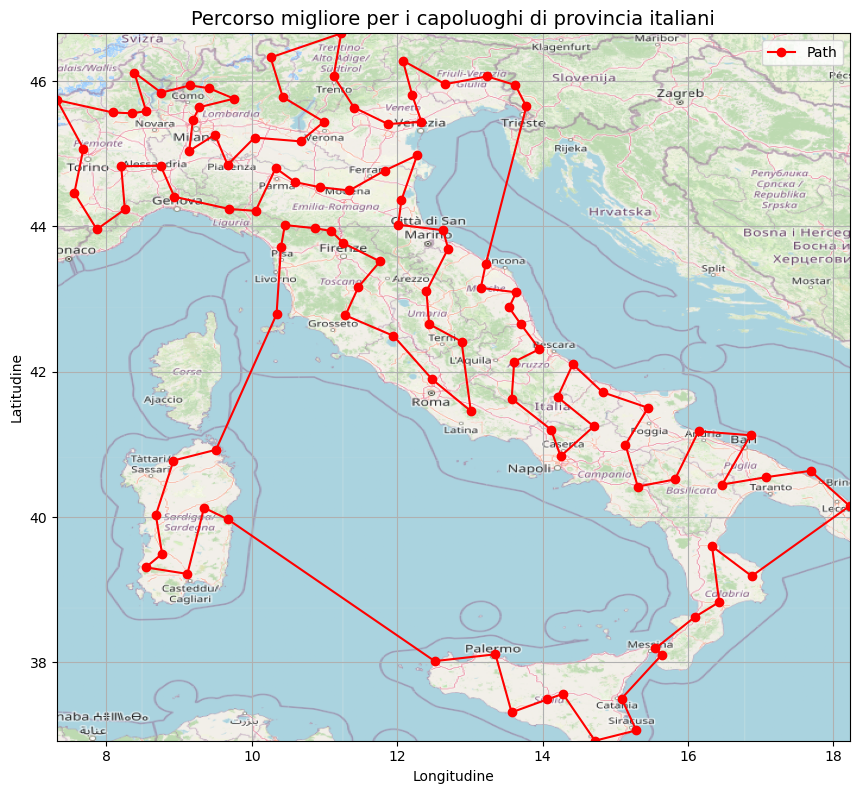

In [3]:
import matplotlib.gridspec as gridspec
import numpy as np

def read_coordinates(filename):
    x_coords = []
    y_coords = []
    with open(filename, 'r') as file:
        for line in file:
            x, y = map(float, line.split())
            x_coords.append(x)
            y_coords.append(y)
    return x_coords, y_coords

def plot_coordinates_with_background(x_coords, y_coords, img_filename):
    # Carica l'immagine di sfondo
    ruh_m = plt.imread(img_filename)

    # Creazione della figura con gridspec
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

    # Area del grafico
    ax = fig.add_subplot(gs[0])

    # Plot with lines connecting points
    ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='r', label='Path')  
    
    # Connect the last point to the first point
    ax.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], linestyle='-', color='r')  

    # Plot delle città
    ax.scatter(x_coords, y_coords, c='r', s=10)

    # Configurazione del titolo e delle etichette
    ax.set_title('Percorso migliore per i capoluoghi di provincia italiani', fontsize=14)
    ax.set_xlabel('Longitudine')
    ax.set_ylabel('Latitudine')

    # Immagine di sfondo
    BBox = (np.min(x_coords), np.max(x_coords), np.min(y_coords), np.max(y_coords))
    ax.imshow(ruh_m, zorder=0, extent=BBox, aspect='equal')

    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    filename = 'italy.dat'
    img_filename = 'ITALIA.png'
    x_coords, y_coords = read_coordinates(filename)
    plot_coordinates_with_background(x_coords, y_coords, img_filename)
